# Project: Wrangling and Analyze Data

In [3]:
#Importing the necessary libraries for the project
import pandas as pd
import requests
import math
import re
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import os
import numpy as np

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#downloading  the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv', mode = 'wb') as file: 
 file.write(response.content)

In [6]:
#import the image predictions into a datafram
image_pred_df = pd.read_csv('image_predictions.tsv', sep ='\t')
image_pred_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,dhole,0.350416,False,hare,0.236661,False,wood_rabbit,0.091133,False
1750,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Authenticating the twitter api keys

consumer_key = '6NspiykQ9RfaJyVppvm3bYMFI'
consumer_secret = 'Z6OzwvG6DqNAMde26EOqGpeuugepEzH7Ibigrlu9NA462orTV7' 
access_token = '2974705989-IR7eHoG7jI1gt8NOa4bpJ83EjZQn7OfPmodpXCX' 
access_token_secret = 'wHJdMLZ5BJOlFNRerxbTypMcmL9CtiJPcG0gs9Cl2TQ8I'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
#get the tweets by their ids using the api get_status
counter = 0

errors_dict = {}
start_time = time.time()
with open('tweet_json.txt', 'w', encoding='utf-8') as file:
    
    for index, tweet_id in twitter_archive_df.tweet_id.iteritems():
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json_data = tweet._json
            
            counter += 1
            print('item number : '+ str(counter))
            print("Success for tweeet" + ": " + str(tweet_id))
            #write the returned tweet to a new line in the file
            json.dump(json_data, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print("An error has occured with tweet : "+ str(tweet_id))
            errors_dict[tweet_id] = e
            continue
end_time = time.time()
#check the excution time 
print("Execution time : " + str(end_time - start_time))
#check for probable errors
print(errors_dict)
    

item number : 1
Success for tweeet: 892420643555336193
item number : 2
Success for tweeet: 892177421306343426
item number : 3
Success for tweeet: 891815181378084864
item number : 4
Success for tweeet: 891689557279858688
item number : 5
Success for tweeet: 891327558926688256
item number : 6
Success for tweeet: 891087950875897856
item number : 7
Success for tweeet: 890971913173991426
item number : 8
Success for tweeet: 890729181411237888
item number : 9
Success for tweeet: 890609185150312448
item number : 10
Success for tweeet: 890240255349198849
item number : 11
Success for tweeet: 890006608113172480
item number : 12
Success for tweeet: 889880896479866881
item number : 13
Success for tweeet: 889665388333682689
item number : 14
Success for tweeet: 889638837579907072
item number : 15
Success for tweeet: 889531135344209921
item number : 16
Success for tweeet: 889278841981685760
item number : 17
Success for tweeet: 888917238123831296
item number : 18
Success for tweeet: 888804989199671297
i

item number : 143
Success for tweeet: 863427515083354112
item number : 144
Success for tweeet: 863079547188785154
item number : 145
Success for tweeet: 863062471531167744
item number : 146
Success for tweeet: 862831371563274240
item number : 147
Success for tweeet: 862722525377298433
item number : 148
Success for tweeet: 862457590147678208
item number : 149
Success for tweeet: 862096992088072192
An error has occured with tweet : 861769973181624320
item number : 150
Success for tweeet: 861383897657036800
item number : 151
Success for tweeet: 861288531465048066
item number : 152
Success for tweeet: 861005113778896900
item number : 153
Success for tweeet: 860981674716409858
item number : 154
Success for tweeet: 860924035999428608
item number : 155
Success for tweeet: 860563773140209665
item number : 156
Success for tweeet: 860524505164394496
item number : 157
Success for tweeet: 860276583193509888
item number : 158
Success for tweeet: 860184849394610176
item number : 159
Success for tweee

item number : 280
Success for tweeet: 837820167694528512
item number : 281
Success for tweeet: 837482249356513284
item number : 282
Success for tweeet: 837471256429613056
An error has occured with tweet : 837366284874571778
item number : 283
Success for tweeet: 837110210464448512
An error has occured with tweet : 837012587749474308
item number : 284
Success for tweeet: 836989968035819520
item number : 285
Success for tweeet: 836753516572119041
item number : 286
Success for tweeet: 836677758902222849
item number : 287
Success for tweeet: 836648853927522308
item number : 288
Success for tweeet: 836397794269200385
item number : 289
Success for tweeet: 836380477523124226
item number : 290
Success for tweeet: 836260088725786625
item number : 291
Success for tweeet: 836001077879255040
item number : 292
Success for tweeet: 835685285446955009
item number : 293
Success for tweeet: 835574547218894849
item number : 294
Success for tweeet: 835536468978302976
item number : 295
Success for tweeet: 8

item number : 421
Success for tweeet: 820013781606658049
item number : 422
Success for tweeet: 819952236453363712
item number : 423
Success for tweeet: 819924195358416896
item number : 424
Success for tweeet: 819711362133872643
item number : 425
Success for tweeet: 819588359383371776
item number : 426
Success for tweeet: 819347104292290561
item number : 427
Success for tweeet: 819238181065359361
item number : 428
Success for tweeet: 819227688460238848
item number : 429
Success for tweeet: 819015337530290176
item number : 430
Success for tweeet: 819015331746349057
item number : 431
Success for tweeet: 819006400881917954
item number : 432
Success for tweeet: 819004803107983360
item number : 433
Success for tweeet: 818646164899774465
item number : 434
Success for tweeet: 818627210458333184
item number : 435
Success for tweeet: 818614493328580609
item number : 436
Success for tweeet: 818588835076603904
item number : 437
Success for tweeet: 818536468981415936
item number : 438
Success for t

item number : 564
Success for tweeet: 800188575492947969
item number : 565
Success for tweeet: 800141422401830912
item number : 566
Success for tweeet: 800018252395122689
item number : 567
Success for tweeet: 799774291445383169
item number : 568
Success for tweeet: 799757965289017345
item number : 569
Success for tweeet: 799422933579902976
item number : 570
Success for tweeet: 799308762079035393
item number : 571
Success for tweeet: 799297110730567681
item number : 572
Success for tweeet: 799063482566066176
item number : 573
Success for tweeet: 798933969379225600
item number : 574
Success for tweeet: 798925684722855936
item number : 575
Success for tweeet: 798705661114773508
item number : 576
Success for tweeet: 798701998996647937
item number : 577
Success for tweeet: 798697898615730177
item number : 578
Success for tweeet: 798694562394996736
item number : 579
Success for tweeet: 798686750113755136
item number : 580
Success for tweeet: 798682547630837760
item number : 581
Success for t

item number : 709
Success for tweeet: 782021823840026624
item number : 710
Success for tweeet: 781955203444699136
item number : 711
Success for tweeet: 781661882474196992
item number : 712
Success for tweeet: 781655249211752448
item number : 713
Success for tweeet: 781524693396357120
item number : 714
Success for tweeet: 781308096455073793
item number : 715
Success for tweeet: 781251288990355457
item number : 716
Success for tweeet: 781163403222056960
item number : 717
Success for tweeet: 780931614150983680
item number : 718
Success for tweeet: 780858289093574656
item number : 719
Success for tweeet: 780800785462489090
item number : 720
Success for tweeet: 780601303617732608
item number : 721
Success for tweeet: 780543529827336192
item number : 722
Success for tweeet: 780496263422808064
item number : 723
Success for tweeet: 780476555013349377
item number : 724
Success for tweeet: 780459368902959104
item number : 725
Success for tweeet: 780192070812196864
item number : 726
Success for t

item number : 850
Success for tweeet: 761292947749015552
item number : 851
Success for tweeet: 761227390836215808
item number : 852
Success for tweeet: 761004547850530816
item number : 853
Success for tweeet: 760893934457552897
item number : 854
Success for tweeet: 760656994973933572
item number : 855
Success for tweeet: 760641137271070720
item number : 856
Success for tweeet: 760539183865880579
item number : 857
Success for tweeet: 760521673607086080
item number : 858
Success for tweeet: 760290219849637889
item number : 859
Success for tweeet: 760252756032651264
item number : 860
Success for tweeet: 760190180481531904
item number : 861
Success for tweeet: 760153949710192640
item number : 862
Success for tweeet: 759943073749200896
An error has occured with tweet : 759923798737051648
item number : 863
Success for tweeet: 759846353224826880
item number : 864
Success for tweeet: 759793422261743616
An error has occured with tweet : 759566828574212096
item number : 865
Success for tweeet: 7

item number : 991
Success for tweeet: 746818907684614144
item number : 992
Success for tweeet: 746790600704425984
item number : 993
Success for tweeet: 746757706116112384
item number : 994
Success for tweeet: 746726898085036033
item number : 995
Success for tweeet: 746542875601690625
item number : 996
Success for tweeet: 746521445350707200
item number : 997
Success for tweeet: 746507379341139972
item number : 998
Success for tweeet: 746369468511756288
item number : 999
Success for tweeet: 746131877086527488
item number : 1000
Success for tweeet: 746056683365994496
item number : 1001
Success for tweeet: 745789745784041472
item number : 1002
Success for tweeet: 745712589599014916
item number : 1003
Success for tweeet: 745433870967832576
item number : 1004
Success for tweeet: 745422732645535745
item number : 1005
Success for tweeet: 745314880350101504
item number : 1006
Success for tweeet: 745074613265149952
item number : 1007
Success for tweeet: 745057283344719872
item number : 1008
Succ

item number : 1134
Success for tweeet: 723912936180330496
item number : 1135
Success for tweeet: 723688335806480385
item number : 1136
Success for tweeet: 723673163800948736
item number : 1137
Success for tweeet: 723179728551723008
item number : 1138
Success for tweeet: 722974582966214656
item number : 1139
Success for tweeet: 722613351520608256
item number : 1140
Success for tweeet: 721503162398597120
item number : 1141
Success for tweeet: 721001180231503872
item number : 1142
Success for tweeet: 720785406564900865
item number : 1143
Success for tweeet: 720775346191278080
item number : 1144
Success for tweeet: 720415127506415616
item number : 1145
Success for tweeet: 720389942216527872
item number : 1146
Success for tweeet: 720340705894408192
item number : 1147
Success for tweeet: 720059472081784833
item number : 1148
Success for tweeet: 720043174954147842
item number : 1149
Success for tweeet: 719991154352222208
item number : 1150
Success for tweeet: 719704490224398336
item number : 

item number : 1276
Success for tweeet: 707420581654872064
item number : 1277
Success for tweeet: 707411934438625280
item number : 1278
Success for tweeet: 707387676719185920
item number : 1279
Success for tweeet: 707377100785885184
item number : 1280
Success for tweeet: 707315916783140866
item number : 1281
Success for tweeet: 707297311098011648
item number : 1282
Success for tweeet: 707059547140169728
item number : 1283
Success for tweeet: 707038192327901184
item number : 1284
Success for tweeet: 707021089608753152
item number : 1285
Success for tweeet: 707014260413456384
item number : 1286
Success for tweeet: 706904523814649856
item number : 1287
Success for tweeet: 706901761596989440
item number : 1288
Success for tweeet: 706681918348251136
item number : 1289
Success for tweeet: 706644897839910912
item number : 1290
Success for tweeet: 706593038911545345
item number : 1291
Success for tweeet: 706538006853918722
item number : 1292
Success for tweeet: 706516534877929472
item number : 

item number : 1419
Success for tweeet: 696490539101908992
item number : 1420
Success for tweeet: 696488710901260288
item number : 1421
Success for tweeet: 696405997980676096
item number : 1422
Success for tweeet: 696100768806522880
item number : 1423
Success for tweeet: 695816827381944320
item number : 1424
Success for tweeet: 695794761660297217
item number : 1425
Success for tweeet: 695767669421768709
item number : 1426
Success for tweeet: 695629776980148225
item number : 1427
Success for tweeet: 695446424020918272
item number : 1428
Success for tweeet: 695409464418041856
item number : 1429
Success for tweeet: 695314793360662529
item number : 1430
Success for tweeet: 695095422348574720
item number : 1431
Success for tweeet: 695074328191332352
item number : 1432
Success for tweeet: 695064344191721472
item number : 1433
Success for tweeet: 695051054296211456
item number : 1434
Success for tweeet: 694925794720792577
item number : 1435
Success for tweeet: 694905863685980160
item number : 

item number : 1562
Success for tweeet: 686683045143953408
item number : 1563
Success for tweeet: 686618349602762752
item number : 1564
Success for tweeet: 686606069955735556
item number : 1565
Success for tweeet: 686394059078897668
item number : 1566
Success for tweeet: 686386521809772549
item number : 1567
Success for tweeet: 686377065986265092
item number : 1568
Success for tweeet: 686358356425093120
item number : 1569
Success for tweeet: 686286779679375361
item number : 1570
Success for tweeet: 686050296934563840
item number : 1571
Success for tweeet: 686035780142297088
item number : 1572
Success for tweeet: 686034024800862208
item number : 1573
Success for tweeet: 686007916130873345
item number : 1574
Success for tweeet: 686003207160610816
item number : 1575
Success for tweeet: 685973236358713344
item number : 1576
Success for tweeet: 685943807276412928
item number : 1577
Success for tweeet: 685906723014619143
item number : 1578
Success for tweeet: 685681090388975616
item number : 

item number : 1703
Success for tweeet: 679844490799091713
item number : 1704
Success for tweeet: 679828447187857408
item number : 1705
Success for tweeet: 679777920601223168
item number : 1706
Success for tweeet: 679736210798047232
item number : 1707
Success for tweeet: 679729593985699840
item number : 1708
Success for tweeet: 679722016581222400
item number : 1709
Success for tweeet: 679530280114372609
item number : 1710
Success for tweeet: 679527802031484928
item number : 1711
Success for tweeet: 679511351870550016
item number : 1712
Success for tweeet: 679503373272485890
item number : 1713
Success for tweeet: 679475951516934144
item number : 1714
Success for tweeet: 679462823135686656
item number : 1715
Success for tweeet: 679405845277462528
item number : 1716
Success for tweeet: 679158373988876288
item number : 1717
Success for tweeet: 679148763231985668
item number : 1718
Success for tweeet: 679132435750195208
item number : 1719
Success for tweeet: 679111216690831360
item number : 

item number : 1844
Success for tweeet: 675146535592706048
item number : 1845
Success for tweeet: 675145476954566656
item number : 1846
Success for tweeet: 675135153782571009
item number : 1847
Success for tweeet: 675113801096802304
item number : 1848
Success for tweeet: 675111688094527488
item number : 1849
Success for tweeet: 675109292475830276
item number : 1850
Success for tweeet: 675047298674663426
item number : 1851
Success for tweeet: 675015141583413248
item number : 1852
Success for tweeet: 675006312288268288
item number : 1853
Success for tweeet: 675003128568291329
item number : 1854
Success for tweeet: 674999807681908736
item number : 1855
Success for tweeet: 674805413498527744
item number : 1856
Success for tweeet: 674800520222154752
item number : 1857
Success for tweeet: 674793399141146624
item number : 1858
Success for tweeet: 674790488185167872
item number : 1859
Success for tweeet: 674788554665512960
item number : 1860
Success for tweeet: 674781762103414784
item number : 

item number : 1986
Success for tweeet: 672222792075620352
item number : 1987
Success for tweeet: 672205392827572224
item number : 1988
Success for tweeet: 672169685991993344
item number : 1989
Success for tweeet: 672160042234327040
item number : 1990
Success for tweeet: 672139350159835138
item number : 1991
Success for tweeet: 672125275208069120
item number : 1992
Success for tweeet: 672095186491711488
item number : 1993
Success for tweeet: 672082170312290304
item number : 1994
Success for tweeet: 672068090318987265
item number : 1995
Success for tweeet: 671896809300709376
item number : 1996
Success for tweeet: 671891728106971137
item number : 1997
Success for tweeet: 671882082306625538
item number : 1998
Success for tweeet: 671879137494245376
item number : 1999
Success for tweeet: 671874878652489728
item number : 2000
Success for tweeet: 671866342182637568
item number : 2001
Success for tweeet: 671855973984772097
item number : 2002
Success for tweeet: 671789708968640512
item number : 

item number : 2129
Success for tweeet: 669583744538451968
item number : 2130
Success for tweeet: 669573570759163904
item number : 2131
Success for tweeet: 669571471778410496
item number : 2132
Success for tweeet: 669567591774625800
item number : 2133
Success for tweeet: 669564461267722241
item number : 2134
Success for tweeet: 669393256313184256
item number : 2135
Success for tweeet: 669375718304980992
item number : 2136
Success for tweeet: 669371483794317312
item number : 2137
Success for tweeet: 669367896104181761
item number : 2138
Success for tweeet: 669363888236994561
item number : 2139
Success for tweeet: 669359674819481600
item number : 2140
Success for tweeet: 669354382627049472
item number : 2141
Success for tweeet: 669353438988365824
item number : 2142
Success for tweeet: 669351434509529089
item number : 2143
Success for tweeet: 669328503091937280
item number : 2144
Success for tweeet: 669327207240699904
item number : 2145
Success for tweeet: 669324657376567296
item number : 

item number : 2271
Success for tweeet: 667065535570550784
item number : 2272
Success for tweeet: 667062181243039745
item number : 2273
Success for tweeet: 667044094246576128
item number : 2274
Success for tweeet: 667012601033924608
item number : 2275
Success for tweeet: 666996132027977728
item number : 2276
Success for tweeet: 666983947667116034
item number : 2277
Success for tweeet: 666837028449972224
item number : 2278
Success for tweeet: 666835007768551424
item number : 2279
Success for tweeet: 666826780179869698
item number : 2280
Success for tweeet: 666817836334096384
item number : 2281
Success for tweeet: 666804364988780544
item number : 2282
Success for tweeet: 666786068205871104
item number : 2283
Success for tweeet: 666781792255496192
item number : 2284
Success for tweeet: 666776908487630848
item number : 2285
Success for tweeet: 666739327293083650
item number : 2286
Success for tweeet: 666701168228331520
item number : 2287
Success for tweeet: 666691418707132416
item number : 

In [7]:
#Loading the content of tweet_json.txt into a dataframe
status_dict = []
with open('tweet_json.txt', 'r') as json_line:
    for line in json_line:
        json_status = json.loads(line)
        #after reading the json line from the fiel, we append it to our list of dictionnary     
        status_dict.append({
            'tweet_id': json_status['id'],
            'favorite_count': json_status['favorite_count'],
            'retweet_count': json_status['retweet_count'],            
                       })

# Create a DataFrame based on the dictionnary created status_dict
df_status = pd.DataFrame(status_dict, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df_status.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33731,6981
1,892177421306343426,29262,5283
2,891815181378084864,21995,3468
3,891689557279858688,36839,7203
4,891327558926688256,35219,7725


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Visual assessement

visualing assessing twitter_archive dataframe

In [8]:
#Randomly checking for tweets
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837482249...,13,10,Waffles,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292...,9,10,a,None,None,None,None
782,775364825476165632,NaN,NaN,2016-09-12 16:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775364825...,11,10,Finley,doggo,None,None,None
234,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1028,745789745784041472,NaN,NaN,2016-06-23 01:25:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He didn't win the Powerball. Quit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745789745...,10,10,Gus,None,None,None,None
2171,669328503091937280,NaN,NaN,2015-11-25 01:35:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirk. He just saw a bacon wrapped tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,None,None,None,None
1851,675710890956750848,NaN,NaN,2015-12-12 16:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He was just told that he couldn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675710890...,12,10,Lenny,None,None,None,None
1839,675891555769696257,NaN,NaN,2015-12-13 04:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675891555...,6,10,Donny,None,None,None,None
1700,680959110691590145,NaN,NaN,2015-12-27 03:51:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzie. He was doing fine until he lost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680959110...,9,10,Ozzie,None,None,None,None


In [9]:
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [10]:
#checking for the tail
twitter_archive_df.tail(5) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


visualing assessing image_predictions dataframe

In [11]:
image_pred_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
309,671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,Chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
244,670465786746662913,https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg,1,axolotl,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False
1056,714606013974974464,https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg,1,Norfolk_terrier,0.293007,True,Labrador_retriever,0.256198,True,golden_retriever,0.129643,True
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True


visualing assessing status dataframe

In [12]:
df_status.sample(10)

,tweet_id,favorite_count,retweet_count
1952,672970152493887488,836,302
1939,673320132811366400,11946,6871
1191,714631576617938945,3016,897
105,871166179821445120,0,4881
136,864279568663928832,13046,2575
176,856526610513747968,10806,1651
693,784183165795655680,18914,7449
1299,705975130514706432,2862,663
1431,695064344191721472,1477,528
161,859607811541651456,16806,1362


# Programmatic  assessement

 Programmatically assessing twitter_archive dataframe

In [13]:
#checking for quality issues such as data type and etc
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#check for duplicates
twitter_archive_df.duplicated().sum()

0

We can observe here that some records are retweet (181) which we are not interested by. 
retweeted_status_id and retweeted_status_user_id are not in the proper data type
timestamp should be in date time

In [15]:
#let us determine the number of  retweets in twitter_archive which id are not present in image_pred_df
twitter_archive_df.query('tweet_id not in @image_pred_df.tweet_id' )

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None


As we can see, we have 281 retweets from our tweeter twitter_archive_df

In [16]:
#checking of there is not rating with denominator different to 10
twitter_archive_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [17]:
twitter_archive_df.iloc[1433].text

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [18]:
#checking the denominator in more details
twitter_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

This is an accuracy data quality problem. We have 23 rows with a denominator different to 10 and some nmerator hich seems to be to high. We can consider these values as outlier values

In [19]:
#checking for names values
twitter_archive_df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Tucker           10
Penny            10
Lola             10
Bo                9
Winston           9
Sadie             8
the               8
an                7
Daisy             7
Bailey            7
Buddy             7
Toby              7
Jack              6
Koda              6
Oscar             6
Dave              6
Bella             6
Milo              6
Scout             6
Rusty             6
Leo               6
Jax               6
Stanley           6
Phil              5
               ... 
Trigger           1
Jessifer          1
Iggy              1
Ralphé            1
Creg              1
Mason             1
Staniel           1
Ziva              1
Augie             1
Pepper            1
Pawnd             1
Covach            1
Coopson           1
Ralph             1
Siba              1
Poppy             1
Bowie             1
Lambeau           1
Erik              1


We can observe that there are names starting in lower case letter

Programmaticaly check image_pred_df

In [20]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#checking for null values
image_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
#Checking for duplicate
image_pred_df.duplicated().sum()

0

Programmaticaly check the df_status dataframe
df_status.infos()

In [23]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [24]:
#Checking for duplicate
df_status.duplicated().sum()

0

In [25]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues
#twitter_archive_df
1. Presence of retweets

2. Presence of tweets with missing ids in the prediction image

3. The data type of in_reply_to_user_id, in_reply_to_status_id are in float

4.  timestamp data type should be modify to date time 

5. Record with rating_denominator less or greater than 10. This consitute an incoherence with reference to the rater documentation

6. Record with rating_numerator less than 10 or too high since these are probably outliers

7. Presence of html tags in source column.

8. Some names starting with lower case instead to start with capital case


### Tidiness issues
1. Since we decided to drop retweets, we should remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from twitter_archive_df
2. The columns floofer, pupper, doggo and puppo should be merged into twitter_archive_df as stage columns and should have as data type category since their value is just limited to 4 possibilities

3. Join the columns retweet_count and favorite_count from df_status to twitter_archive_df for a better data nalysis
4. p1_conf,p2_conf,p3_conf can be used to evaluate how weel the deep learning prediction algorithm performs, so, so these columns should be added to twitter_archive_df


## Cleaning Data


In [26]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
image_pred_df_clean = image_pred_df.copy()
df_status_clean  = df_status.copy() 

### Quality issues

### Issue #1: twitter_archive_df contains  retweets marked by a non-null retweeted_status_id

#### Define: Remove retweets from twitter_archive_df and keep the record with retweeted_status_id = null

#### Code

In [27]:
twitter_archive_df_clean = twitter_archive_df[twitter_archive_df['retweeted_status_id'].isnull()]
twitter_archive_df_clean.shape

(2175, 17)

#### Test

In [28]:
twitter_archive_df_clean[twitter_archive_df_clean['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: Some tweets have missing ids in the prediction image

#### Define:   Remove those tweets with missing ids in the prediction image

#### Code

In [29]:
twitter_archive_df_clean = twitter_archive_df_clean.query('tweet_id in @image_pred_df.tweet_id' )

#### Test

In [30]:
twitter_archive_df_clean.query('tweet_id not in @image_pred_df.tweet_id' ).shape

(0, 17)

### Issue #3: in_reply_to_user_id, in_reply_to_status_id should be in int64 not float

#### Define:   Modify the data type of in_reply_to_user_id, in_reply_to_status_id into int64

#### Code

In [31]:
#to convert those columns, we need to fill the null values to avoid errors
twitter_archive_df_clean.in_reply_to_status_id = twitter_archive_df_clean.in_reply_to_status_id.replace(np.nan, 0)
twitter_archive_df_clean.in_reply_to_user_id = twitter_archive_df_clean.in_reply_to_user_id.replace(np.nan, 0)


In [32]:
#convert using astype
twitter_archive_df_clean.in_reply_to_status_id = twitter_archive_df_clean.in_reply_to_status_id.astype(np.int64)
twitter_archive_df_clean.in_reply_to_user_id = twitter_archive_df_clean.in_reply_to_user_id.astype(np.int64)

#### Test

In [33]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(2), int64(5), object(1

### Issue #4: timestamp data type should be modify to date time

#### Define:   Modify the data type of timestamp into date time

#### Code

In [34]:
twitter_archive_df_clean.timestamp = pd.to_datetime(twitter_archive_df_clean.timestamp)

#### Test

In [35]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), flo

### issues #5 : Record with rating_denominator less or greater than 10. This consitute an incoherence with reference to the rater documentation. Regarding  the rater himself, it will be more coherent to make these values = 10

#### Define : Update rating_denominator to 10 for columns with different to 10

### code

In [36]:
for i, record in twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator != 10].iterrows(): 
    twitter_archive_df_clean.at[i, 'rating_denominator'] = 10

#### Test 

In [37]:
twitter_archive_df_clean.query('rating_denominator != 10').head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### issues #6 : Record with nominator  too high

#### Define : Drop record with rating_numenator too high (greater than 20) 

#### Code

twitter_archive_df_clean.rating_numerator.value_counts().sort_index()

In [38]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.rating_numerator < 20]

#### Test

In [39]:
twitter_archive_df_clean.rating_numerator.value_counts().sort_index()

0       2
1       5
2       9
3      19
4      16
5      33
6      32
7      52
8      95
9     151
10    419
11    396
12    450
13    261
14     35
Name: rating_numerator, dtype: int64

### issues #7 : Presence of html tags in source column.

#### Define : Remove the html tag in source columns

#### Code

In [40]:
#iterate through each row and split at >, then get the second element and remove the last 3 characters(</a)
for i, row in twitter_archive_df_clean.iterrows():
    source = row['source']
    source = source.split('>')[1][:-3]
    twitter_archive_df_clean.at[i, 'source'] = source

#### Test

In [41]:
twitter_archive_df_clean.source.value_counts()

Twitter for iPhone    1937
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### issues #8 : Some names starting with lower case instead to start with capital case

#### Define: Capitalize the name start of names beguining with lower case

#### Code

In [42]:
for i, row in twitter_archive_df_clean.iterrows():
    name = row['name']
    name = name.capitalize()
    twitter_archive_df_clean.at[i, 'name'] = name

#### Test

In [43]:
twitter_archive_df_clean.name.value_counts().sort_index()

A               54
Abby             2
Ace              1
Acro             1
Actually         1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            4
Alfy             1
Alice            2
All              1
Amber            1
Ambrose          1
Amy              1
Amélie           1
An               6
Anakin           1
Andru            1
Andy             1
Angel            1
                ..
Waffles          3
Walker           1
Wallace          3
Wally            2
Walter           3
Watson           2
Wesley           1
Wiggles          1
Willem           1
William          1
Willie           1
Willow           1
Willy            1
Wilson           3
Winifred         1
Winnie           4
Winston          8
Wishes           1
Wyatt            3
Yoda             1
Yogi             2
Zara        

### Tidiness issues

### Issues #1: SInce we decided to drop retweets, we should remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from twitter_archive_df

#### Define : remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from twitter_archive_df

#### Code

In [44]:
twitter_archive_df_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

#### Test

In [45]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issues #2: The columns floofer, pupper, doggo and puppo should be merged into twitter_archive_df as stage columns and should have as data type category since their value is just limited to 4 possibilities

#### Define : Melt the columns floofer, pupper, doggo and puppo into twitter_archive_df as stage columns

#### Code

In [46]:
#Melt the columns  doggo', 'floofer', 'pupper', 'puppo' into one column namd stage
twitter_archive_df_clean['stage'] = twitter_archive_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [47]:
#convert the data type of stage column to category
twitter_archive_df_clean.stage= twitter_archive_df_clean.stage.astype('category')

In [48]:
#drop the melted columns
twitter_archive_df_clean.drop( columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [51]:
#Check for colmns names
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [52]:
#Check for duplicated
twitter_archive_df_clean.duplicated().sum()

0

In [53]:
#Check for stage values
twitter_archive_df_clean.stage.value_counts()

None       1670
pupper      211
doggo        63
puppo        23
floofer       8
Name: stage, dtype: int64

In [54]:
#Check if the data type has changed
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 1975 non-null int64
in_reply_to_status_id    1975 non-null int64
in_reply_to_user_id      1975 non-null int64
timestamp                1975 non-null datetime64[ns]
source                   1975 non-null object
text                     1975 non-null object
expanded_urls            1975 non-null object
rating_numerator         1975 non-null int64
rating_denominator       1975 non-null int64
name                     1975 non-null object
stage                    1975 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 251.9+ KB


### Issues #3: The columns retweet_count and favorite_count from df_status should be join to twitter_archive_df for a better data nalysis

#### Define: Merge  the columns retweet_count and favorite_count from df_status to twitter_archive_df for a better data nalysis

#### Code:

In [55]:
twitter_archive_df_clean = twitter_archive_df_clean.merge(df_status, how='inner', on='tweet_id',)

#### Test:

In [56]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 13 columns):
tweet_id                 1967 non-null int64
in_reply_to_status_id    1967 non-null int64
in_reply_to_user_id      1967 non-null int64
timestamp                1967 non-null datetime64[ns]
source                   1967 non-null object
text                     1967 non-null object
expanded_urls            1967 non-null object
rating_numerator         1967 non-null int64
rating_denominator       1967 non-null int64
name                     1967 non-null object
stage                    1967 non-null category
favorite_count           1967 non-null int64
retweet_count            1967 non-null int64
dtypes: category(1), datetime64[ns](1), int64(7), object(4)
memory usage: 201.9+ KB


In [57]:
twitter_archive_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,33731,6981


In [58]:
#Check for duplicated
twitter_archive_df_clean.duplicated().sum()

0

### Issue #4 : p1_conf,p2_conf,p3_conf can be used to evaluate how weel the deep learning prediction algorithm performs, so, so these columns should be added to twitter_archive_df

### Define : Add p1_conf, p2_conf and p3_conf columns to twitter_archive_df_clean

### Code

In [59]:
#select our column of interess from image_pred_df_clean
confidence = image_pred_df_clean[['tweet_id','p1_conf', 'p2_conf','p3_conf']]


In [60]:
#merge our column of interess with twitter_archive_df_clean
twitter_archive_df_clean = twitter_archive_df_clean.merge(confidence, how='inner', on='tweet_id',)

#### Test

In [61]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 16 columns):
tweet_id                 1967 non-null int64
in_reply_to_status_id    1967 non-null int64
in_reply_to_user_id      1967 non-null int64
timestamp                1967 non-null datetime64[ns]
source                   1967 non-null object
text                     1967 non-null object
expanded_urls            1967 non-null object
rating_numerator         1967 non-null int64
rating_denominator       1967 non-null int64
name                     1967 non-null object
stage                    1967 non-null category
favorite_count           1967 non-null int64
retweet_count            1967 non-null int64
p1_conf                  1967 non-null float64
p2_conf                  1967 non-null float64
p3_conf                  1967 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 248.0+ KB


In [62]:
#Check for duplicated
twitter_archive_df_clean.duplicated().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
twitter_archive_df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [64]:
#loading the data frame
df = twitter_archive_df_clean.copy()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 16 columns):
tweet_id                 1967 non-null int64
in_reply_to_status_id    1967 non-null int64
in_reply_to_user_id      1967 non-null int64
timestamp                1967 non-null datetime64[ns]
source                   1967 non-null object
text                     1967 non-null object
expanded_urls            1967 non-null object
rating_numerator         1967 non-null int64
rating_denominator       1967 non-null int64
name                     1967 non-null object
stage                    1967 non-null category
favorite_count           1967 non-null int64
retweet_count            1967 non-null int64
p1_conf                  1967 non-null float64
p2_conf                  1967 non-null float64
p3_conf                  1967 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 248.0+ KB


### Insights 1: Check for the most retweeteted tweet

In [83]:
most_retweeted = df[['tweet_id','retweet_count']].sort_values(by='retweet_count',ascending=False)
most_retweeted

,tweet_id,retweet_count
762,744234799360020481,70456
797,739238157791694849,52725
394,807106840509214720,51498
305,822872901745569793,39820
58,879415818425184262,37327
328,819004803107983360,34466
396,806629075125202948,32272
107,866450705531457537,30100
1400,678399652199309312,28494
1457,676219687039057920,27690


In [88]:
#Chinking in fo about the first most retweeted tweet
df.query('tweet_id== @most_retweeted.tweet_id.iloc[0]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
762,744234799360020481,0,0,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,144461,70456,0.825333,0.044681,0.018442


Text(0,0.5,'Number of Retweets')

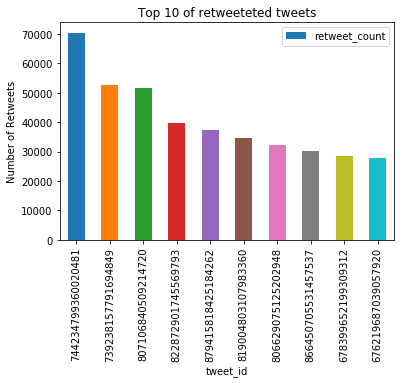

In [84]:
#Visualize the Top 10 of retweeteted tweets
most_retweeted.head(10).plot(x= 'tweet_id',y='retweet_count', kind='bar')
plt.title('Top 10 of retweeteted tweets')
plt.ylabel('Number of Retweets')

We choosed this bar chart to visualise the top most retweeted tweets because, it is easy to grap the insight and the difference between different values

### Insights 2: Check for the tweet with the highest number of favorite


In [78]:
most_favorite = df[['tweet_id','favorite_count',]].sort_values(by='favorite_count',ascending=False)
most_favorite

,tweet_id,favorite_count
762,744234799360020481,144461
305,822872901745569793,123812
394,807106840509214720,111377
107,866450705531457537,108633
797,739238157791694849,106963
58,879415818425184262,92642
328,819004803107983360,82505
134,859196978902773760,80391
92,870374049280663552,73805
1400,678399652199309312,73322


Text(0,0.5,'Number of Favorites')

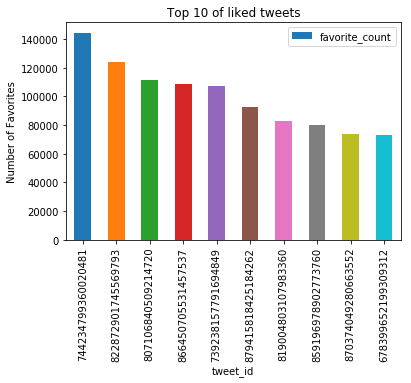

In [94]:
#Visualize the Top 10 of liked tweets
most_favorite.head(10).plot(x= 'tweet_id', y='favorite_count',kind='bar')
plt.title('Top 10 of liked tweets')
plt.ylabel('Number of Favorites')

In [91]:
#Chinking in fo about the first most retweeted tweet
df.query('tweet_id== @most_favorite.tweet_id.iloc[0]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
762,744234799360020481,0,0,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,144461,70456,0.825333,0.044681,0.018442


We choosed this bar chart to visualise the top most retweeted tweets because, it is easy to grap the insight and the difference between different values

### Insights 3: Most used  source of tweets
 

In [237]:
df.source.value_counts()

Twitter for iPhone    7720
Twitter Web Client     112
TweetDeck               36
Name: source, dtype: int64

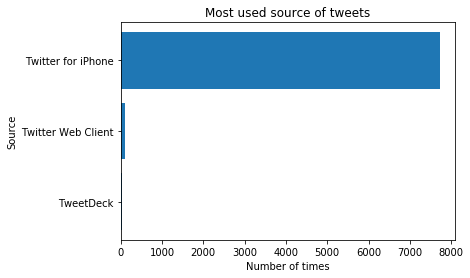

In [238]:
#Visualise the most used source for tweets
datas = df.source.value_counts()
#define data
data = datas.values
labels = datas.index

plt.barh(labels, data)
 
# setting label of y-axis
plt.ylabel("Source")

# setting label of x-axis
plt.xlabel("Number of times")

plt.title("Most used source of tweets")
plt.show()

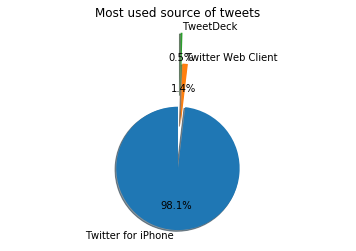

In [122]:
#View the distribution on a pie chart
labels = df.source.value_counts().index
sizes = df.source.value_counts().values
explode = (0.6, 0.1, 0.6, )  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Most used source of tweets')

plt.show()

### Visualization

### Visualization #1 : Prediction algorithm confidence on the 3 pictures

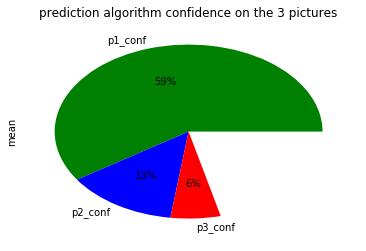

In [239]:
#Visualize the prediction algorithm confidence on the 3 pictures by taking the mean of the confidence on each image
performance = df[['p1_conf','p2_conf','p3_conf']].describe().loc['mean']
performance.plot(kind='pie', y='points', autopct='%1.0f%%',
                                colors = ['green', 'blue', 'red'],
                                title='prediction algorithm confidence on the 3 pictures')

We can see from this pie chart that the algorithm is more confident in predicting pict 1

### Visualization #2 : Rating distribution

Text(0.5,0,'Rating distribution on 10')

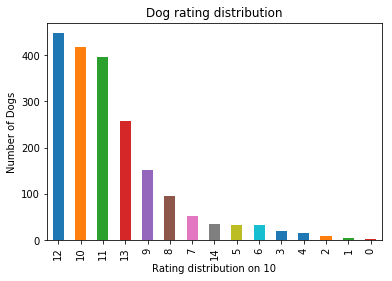

In [126]:
df.rating_numerator.value_counts().plot(kind='bar')
plt.title('Dog rating distribution')
plt.ylabel('Number of Dogs')
plt.xlabel('Rating distribution on 10')

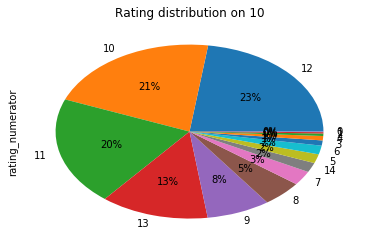

In [127]:
df.rating_numerator.value_counts().plot(kind='pie',autopct='%1.0f%%',title='Rating distribution on 10')

### Visualization #2 : Evolution of tweets made by WeRateDogs

Text(0,0.5,'Number of Tweets')

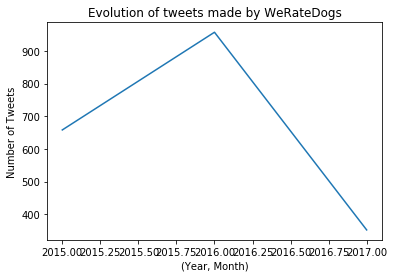

In [128]:
data = df.tweet_id.groupby(df["timestamp"].dt.year).count()
data.plot('line', title='Evolution of tweets made by WeRateDogs')
plt.xlabel("(Year, Month)")
plt.ylabel("Number of Tweets")

We can see that the tweeting  trend of WeRateDogs is decreasing from 2015 to 2017